In [1]:
# import libraries
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
import time
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns 
import html
from bs4 import BeautifulSoup
import requests
import os
from selenium import webdriver
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
import warnings; warnings.simplefilter('ignore')
from VE_scraper_functions import *
from chromedriver_py import binary_path # this will get you the path variable
from selenium.webdriver.common.by import By
import time
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Daniel.Lang\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [2]:
# import dataset
path = "park_scrape_content_dataset.xlsx"
park_scrape_dataset2 = pd.read_excel(path)
park_scrape_dataset2.head

<bound method NDFrame.head of        Unnamed: 0  index                                       website page                                            content website location  park
0               0      0  https://home.nps.gov/abli/planyourvisit/direct...  Directions - Abraham Lincoln Birthplace Nation...              NaN  ABLI
1               1      1  https://home.nps.gov/abli/planyourvisit/direct...  Directions - Abraham Lincoln Birthplace Nation...              NaN  ABLI
2               2      2  https://home.nps.gov/abli/planyourvisit/direct...  Directions - Abraham Lincoln Birthplace Nation...              NaN  ABLI
3               3      3  https://home.nps.gov/abli/planyourvisit/direct...  Directions - Abraham Lincoln Birthplace Nation...              NaN  ABLI
4               4      4  https://home.nps.gov/abli/planyourvisit/direct...  Directions - Abraham Lincoln Birthplace Nation...              NaN  ABLI
...           ...    ...                                              

In [3]:
## convert all text to lowercase to avoid case sensitivity issues
park_scrape_dataset2['content'] = park_scrape_dataset2['content'].str.lower()
park_scrape_dataset2.head

<bound method NDFrame.head of        Unnamed: 0  index                                       website page                                            content website location  park
0               0      0  https://home.nps.gov/abli/planyourvisit/direct...  directions - abraham lincoln birthplace nation...              NaN  ABLI
1               1      1  https://home.nps.gov/abli/planyourvisit/direct...  directions - abraham lincoln birthplace nation...              NaN  ABLI
2               2      2  https://home.nps.gov/abli/planyourvisit/direct...  directions - abraham lincoln birthplace nation...              NaN  ABLI
3               3      3  https://home.nps.gov/abli/planyourvisit/direct...  directions - abraham lincoln birthplace nation...              NaN  ABLI
4               4      4  https://home.nps.gov/abli/planyourvisit/direct...  directions - abraham lincoln birthplace nation...              NaN  ABLI
...           ...    ...                                              

In [4]:
parking_words =  [
       "parking lot", "parking", "pull off", "pulloff", "pull-off", "total space", "parking space", "oversized space",
"garage", "parking spot", "parking tag", "vehicle space", "parking area"]

In [5]:
def count_parking_words(text):
    word_counts = {word: text.lower().count(word) for word in parking_words}
    return word_counts
word_counts_df = park_scrape_dataset2['content'].apply(count_parking_words).apply(pd.Series)
word_counts_df['total'] = word_counts_df.sum(axis=1)
word_counts_df.head()

,parking lot,parking,pull off,pulloff,pull-off,total space,parking space,oversized space,garage,parking spot,parking tag,vehicle space,parking area,total
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [6]:
park_scrape_dataset2 = pd.concat([park_scrape_dataset2, word_counts_df], axis=1)
park_scrape_dataset2 = park_scrape_dataset2.drop("content", axis="columns")
park_scrape_dataset2.head

<bound method NDFrame.head of        Unnamed: 0  index                                       website page website location  park  parking lot  parking  pull off  pulloff  pull-off  total space  parking space  oversized space  garage  parking spot  parking tag  vehicle space  parking area  total
0               0      0  https://home.nps.gov/abli/planyourvisit/direct...              NaN  ABLI            0        0         0        0         0            0              0                0       0             0            0              0             0      0
1               1      1  https://home.nps.gov/abli/planyourvisit/direct...              NaN  ABLI            0        0         0        0         0            0              0                0       0             0            0              0             0      0
2               2      2  https://home.nps.gov/abli/planyourvisit/direct...              NaN  ABLI            0        0         0        0         0            0          

In [7]:
park_scrape_dataset2.to_csv("parkingtest.csv")

In [8]:
path = "clusterlookup.csv"
clusters = pd.read_csv(path)
clusters.head

<bound method NDFrame.head of     Park Alpha                                      NPS Full Name Region  FinalCluster                    Label
0         ABLI  Abraham Lincoln Birthplace National Historical...    SER             8    Rural High Visitation
1         ACAD                               Acadia National Park    NER             1            Transit Parks
2         ADAM                     Adams National Historical Park    NER             1            Transit Parks
3         AFBG            African Burial Ground National Monument    NER             2              Urban Sites
4         AGFO                Agate Fossil Beds National Monument    MWR             7     Rural Low Visitation
..         ...                                                ...    ...           ...                      ...
383       WWIM                               World War I Memorial    NCR             2              Urban Sites
384       YELL                          Yellowstone National Park    IMR  

In [11]:
park_word_counts = park_scrape_dataset2.groupby('park')[parking_words].sum()
park_word_counts['total'] = park_word_counts.sum(axis=1)
park_word_counts.head

<bound method NDFrame.head of       parking lot  parking  pull off  pulloff  pull-off  total space  parking space  oversized space  garage  parking spot  parking tag  vehicle space  parking area  total
park                                                                                                                                                                       
ABLI            0        0         0        0         0            0              0                0       0             0            0              0             0      0
ACAD           49      331         0        0         1            0             10                0       0             0            0              0           216    607
ADAM            0      103         0        0         0            0              0                0      39             0            0              0             0    142
AFBG            0       15         0        0         0            0              0                0       0  

In [12]:
clustersubset = clusters[['Park Alpha', "FinalCluster", "Label"]]
clustersubset.rename(columns={'Park Alpha':"park"}, inplace = True)
clusterparks = pd.merge(park_word_counts, clustersubset, on="park", how="left")
clusterparks.head

<bound method NDFrame.head of      park  parking lot  parking  pull off  pulloff  pull-off  total space  parking space  oversized space  garage  parking spot  parking tag  vehicle space  parking area  total  FinalCluster                    Label
0    ABLI            0        0         0        0         0            0              0                0       0             0            0              0             0      0           8.0    Rural High Visitation
1    ACAD           49      331         0        0         1            0             10                0       0             0            0              0           216    607           1.0            Transit Parks
2    ADAM            0      103         0        0         0            0              0                0      39             0            0              0             0    142           1.0            Transit Parks
3    AFBG            0       15         0        0         0            0              0                0 

In [13]:
clusterparks.to_csv("parkingbypark.csv")

In [14]:
total_parks_counts = clusterparks.groupby('Label').size().reset_index(name='Total_Parks')
total_parks_counts['Total_Parks'] = total_parks_counts['Total_Parks'].astype(int) 
filtered_df = clusterparks[clusterparks['total'] > 1]
ev_parks_counts = filtered_df.groupby('Label').size().reset_index(name='parking_Parks')
label_counts = pd.merge(total_parks_counts, ev_parks_counts, on='Label', how='left')
label_counts['parking_Parks'].fillna(0, inplace=True)
label_counts['Percent_parking'] = round((label_counts['parking_Parks'] / label_counts['Total_Parks']) * 100, 1)
label_counts['parking_Parks'] = label_counts['parking_Parks'].astype(int)
label_counts.head()

,Label,Total_Parks,parking_Parks,Percent_parking
0,High Seasonal Variation,42,34,81.0
1,Low Visitation Sites,19,19,100.0
2,Rural High Visitation,63,57,90.5
3,Rural Low Visitation,72,61,84.7
4,Transit Parks,49,46,93.9


In [15]:
total_row = label_counts.sum(numeric_only=True)
total_row['Label'] = 'Total'
total_counts = label_counts.append(total_row, ignore_index=True)
total_counts['parking_Parks'] = total_counts['parking_Parks'].astype(int)
total_counts['Total_Parks'] = total_counts['Total_Parks'].astype(int)
total_counts.loc[total_counts['Label'] == 'Total', 'Percent_parking'] = round((total_counts.loc[total_counts['Label'] == 'Total', 'parking_Parks'] / total_counts.loc[total_counts['Label'] == 'Total', 'Total_Parks']) * 100, 1)
total_counts.tail()

,Label,Total_Parks,parking_Parks,Percent_parking
4,Transit Parks,49,46,93.9
5,Urban High Visitation,34,30,88.2
6,Urban Low Visitation,66,60,90.9
7,Urban Sites,38,33,86.8
8,Total,383,340,88.8


In [16]:
total_counts.to_csv("parkingbycluster.csv")

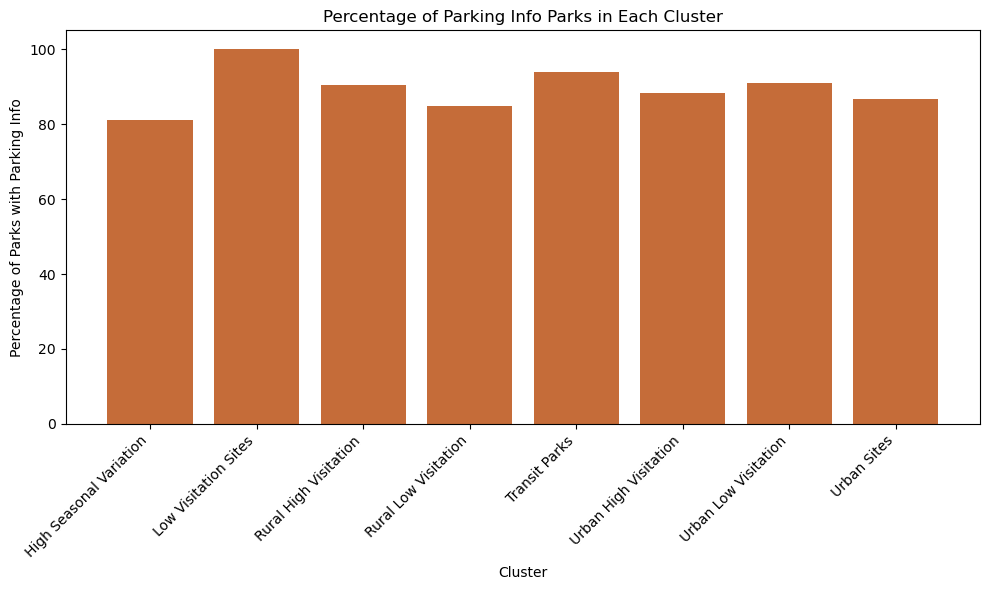

In [17]:
plt.figure(figsize=(10, 6)) 
plt.bar(label_counts['Label'], label_counts['Percent_parking'], color='#C56C39')
plt.xlabel('Cluster')
plt.ylabel('Percentage of Parks with Parking Info')
plt.title('Percentage of Parking Info Parks in Each Cluster')
plt.xticks(rotation=45, ha='right') 
plt.tight_layout()
plt.show()

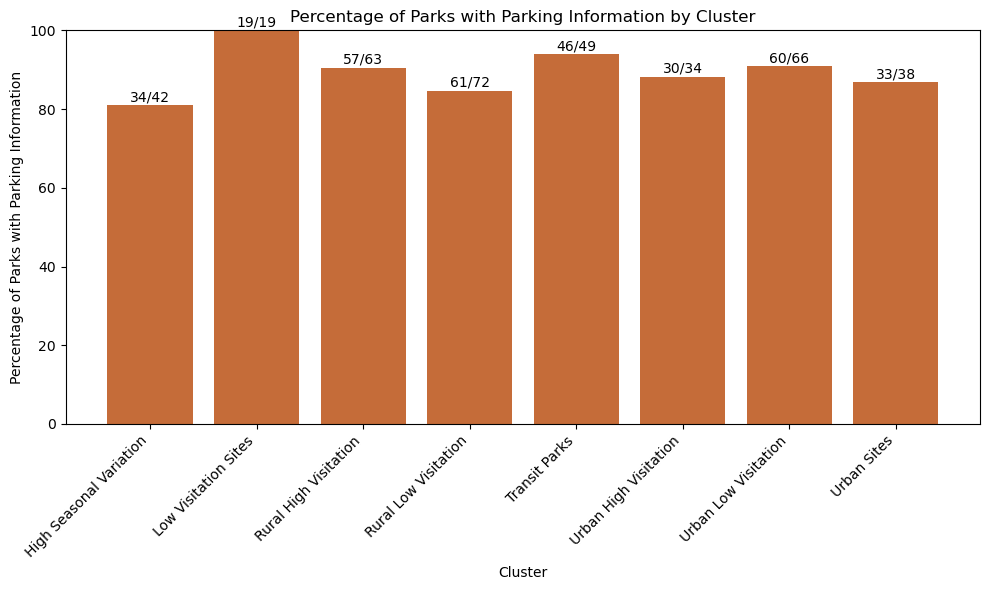

In [19]:
plt.figure(figsize=(10, 6)) 
bars = plt.bar(label_counts['Label'], label_counts['Percent_parking'], color='#C56C39')

for i, bar in enumerate(bars):
    ev_parks = label_counts['parking_Parks'].iloc[i]
    total_parks = label_counts['Total_Parks'].iloc[i]
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.25,
             f"{ev_parks}/{total_parks}",
             ha='center', va='bottom')

plt.xlabel('Cluster')
plt.ylabel('Percentage of Parks with Parking Information')
plt.title('Percentage of Parks with Parking Information by Cluster')
plt.xticks(rotation=45, ha='right') 
plt.ylim(0, 100)
plt.tight_layout()
plt.savefig("ParkingGraph.png")
plt.show()

In [23]:
park_scrape_dataset2['parkingpage'] = park_scrape_dataset2['website page'].apply(lambda x: 1 if 'parking' in str(x).lower() else 0)
park_scrape_dataset2.head()

,Unnamed: 0,index,website page,website location,park,parking lot,parking,pull off,pulloff,pull-off,total space,parking space,oversized space,garage,parking spot,parking tag,vehicle space,parking area,total,parkingpage
0,0,0,https://home.nps.gov/abli/planyourvisit/direct...,NaN,ABLI,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,1,https://home.nps.gov/abli/planyourvisit/direct...,NaN,ABLI,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2,2,https://home.nps.gov/abli/planyourvisit/direct...,NaN,ABLI,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,3,3,https://home.nps.gov/abli/planyourvisit/direct...,NaN,ABLI,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,4,4,https://home.nps.gov/abli/planyourvisit/direct...,NaN,ABLI,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [32]:
parkingpages = park_scrape_dataset2[park_scrape_dataset2['parkingpage'] == 1]
parkingpages = parkingpages[['website page', 'park', 'total', 'parkingpage']]
parkingpages.to_csv("parkingpages.csv")
parkingpages.head()

,website page,park,total,parkingpage
634,https://home.nps.gov/arch/planyourvisit/parkin...,ARCH,53,1
1700,https://www.nps.gov/brca/planyourvisit/parking...,BRCA,154,1
2320,https://home.nps.gov/carl/planyourvisit/parkin...,CARL,27,1
2379,https://home.nps.gov/cato/planyourvisit/parkin...,CATO,363,1
2645,https://www.nps.gov/chat/planyourvisit/parking...,CHAT,191,1


In [28]:
newclusters = pd.merge(clusterparks, parkingpages, on='park', how='left')
newclusters.head()

,park,parking lot,parking,pull off,pulloff,pull-off,total space,parking space,oversized space,garage,parking spot,parking tag,vehicle space,parking area,total_x,FinalCluster,Label,website page,total_y,parkingpage
0,ABLI,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8.0,Rural High Visitation,NaN,NaN,NaN
1,ACAD,49,331,0,0,1,0,10,0,0,0,0,0,216,607,1.0,Transit Parks,NaN,NaN,NaN
2,ADAM,0,103,0,0,0,0,0,0,39,0,0,0,0,142,1.0,Transit Parks,NaN,NaN,NaN
3,AFBG,0,15,0,0,0,0,0,0,0,0,0,0,0,15,2.0,Urban Sites,NaN,NaN,NaN
4,AGFO,10,29,0,0,0,0,6,0,0,0,0,0,10,55,7.0,Rural Low Visitation,NaN,NaN,NaN


In [31]:
filtered_df = newclusters[newclusters['parkingpage'] == 1]
ev_parks_counts = filtered_df.groupby('Label').size().reset_index(name='parking_Parks')
label_counts = pd.merge(total_parks_counts, ev_parks_counts, on='Label', how='left')
label_counts['parking_Parks'].fillna(0, inplace=True)
label_counts['Percent_parking'] = round((label_counts['parking_Parks'] / label_counts['Total_Parks']) * 100, 1)
label_counts['parking_Parks'] = label_counts['parking_Parks'].astype(int)
label_counts.head()

,Label,Total_Parks,parking_Parks,Percent_parking
0,High Seasonal Variation,42,0,0.0
1,Low Visitation Sites,19,0,0.0
2,Rural High Visitation,63,7,11.1
3,Rural Low Visitation,72,0,0.0
4,Transit Parks,49,12,24.5


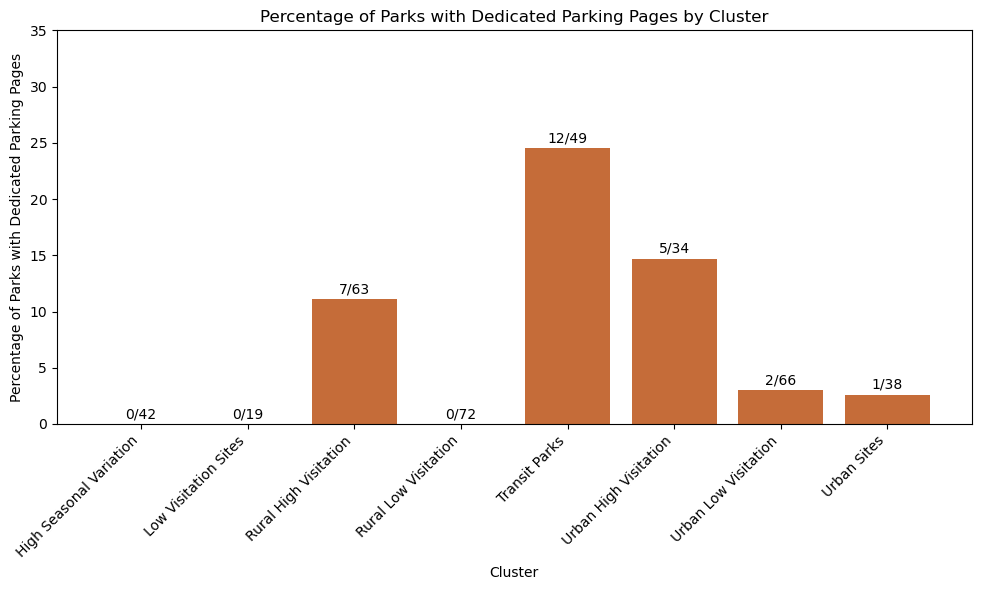

In [35]:
plt.figure(figsize=(10, 6)) 
bars = plt.bar(label_counts['Label'], label_counts['Percent_parking'], color='#C56C39')

for i, bar in enumerate(bars):
    ev_parks = label_counts['parking_Parks'].iloc[i]
    total_parks = label_counts['Total_Parks'].iloc[i]
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.25,
             f"{ev_parks}/{total_parks}",
             ha='center', va='bottom')

plt.xlabel('Cluster')
plt.ylabel('Percentage of Parks with Dedicated Parking Pages')
plt.title('Percentage of Parks with Dedicated Parking Pages by Cluster')
plt.xticks(rotation=45, ha='right') 
plt.ylim(0, 35)
plt.tight_layout()
plt.savefig("ParkingPages.png")
plt.show()